# Supplementary Figure 5: Filtered models

The difference in pointwise contributions to the ELPD between the best performing model and the model with the same priors on the Yeo-Johnson parameter but a filter on the expected probability of hail. The best performing model is superior to the filtered model when the difference is positive.

## Package imports

In [1]:
additional_package_lib <- "/scratch/w42/ig1052/rlibs"

suppressPackageStartupMessages({
  library(tidyverse)
  library(latex2exp, lib.loc = additional_package_lib)
  library(scico)
})

## Reading in data

In [2]:
# best model name
model_name <- "hail_trans_std_mesh_report_trans_std_dens_yjwide_gamma"
# model for comparison
compare_model_name <- "hail_trans_std_mesh_report_trans_std_dens_yjwide_filter_probhail"
# base dir
base_dir <- "/g/data/w42/ig1052/bayesian_paper_data/"

# model data
model_data <- read_csv(paste(base_dir, "modelling_data",
                              paste0("filtered_allpredictors_noedges_popdens_ssa_variable_",
                              "diameter_comment_radar_66_variable_mesh_t_x_y_binned_",
                              "t_2010-01-01_2016-04-24_6_x_151.75_153.50_0.25_y_-29.00_-26.50_0.25.csv"),
                            sep = "/"),
                      col_types = "nnTnnnnnnncnffffff")

# loo objects
loo_gamma <- readRDS(paste(base_dir, "model_eval", model_name, "eval", "loo_object.rds", sep = "/"))
loo_filter <- readRDS(paste(base_dir, "model_eval", compare_model_name, "eval", "loo_object.rds", sep = "/"))

## Plotting

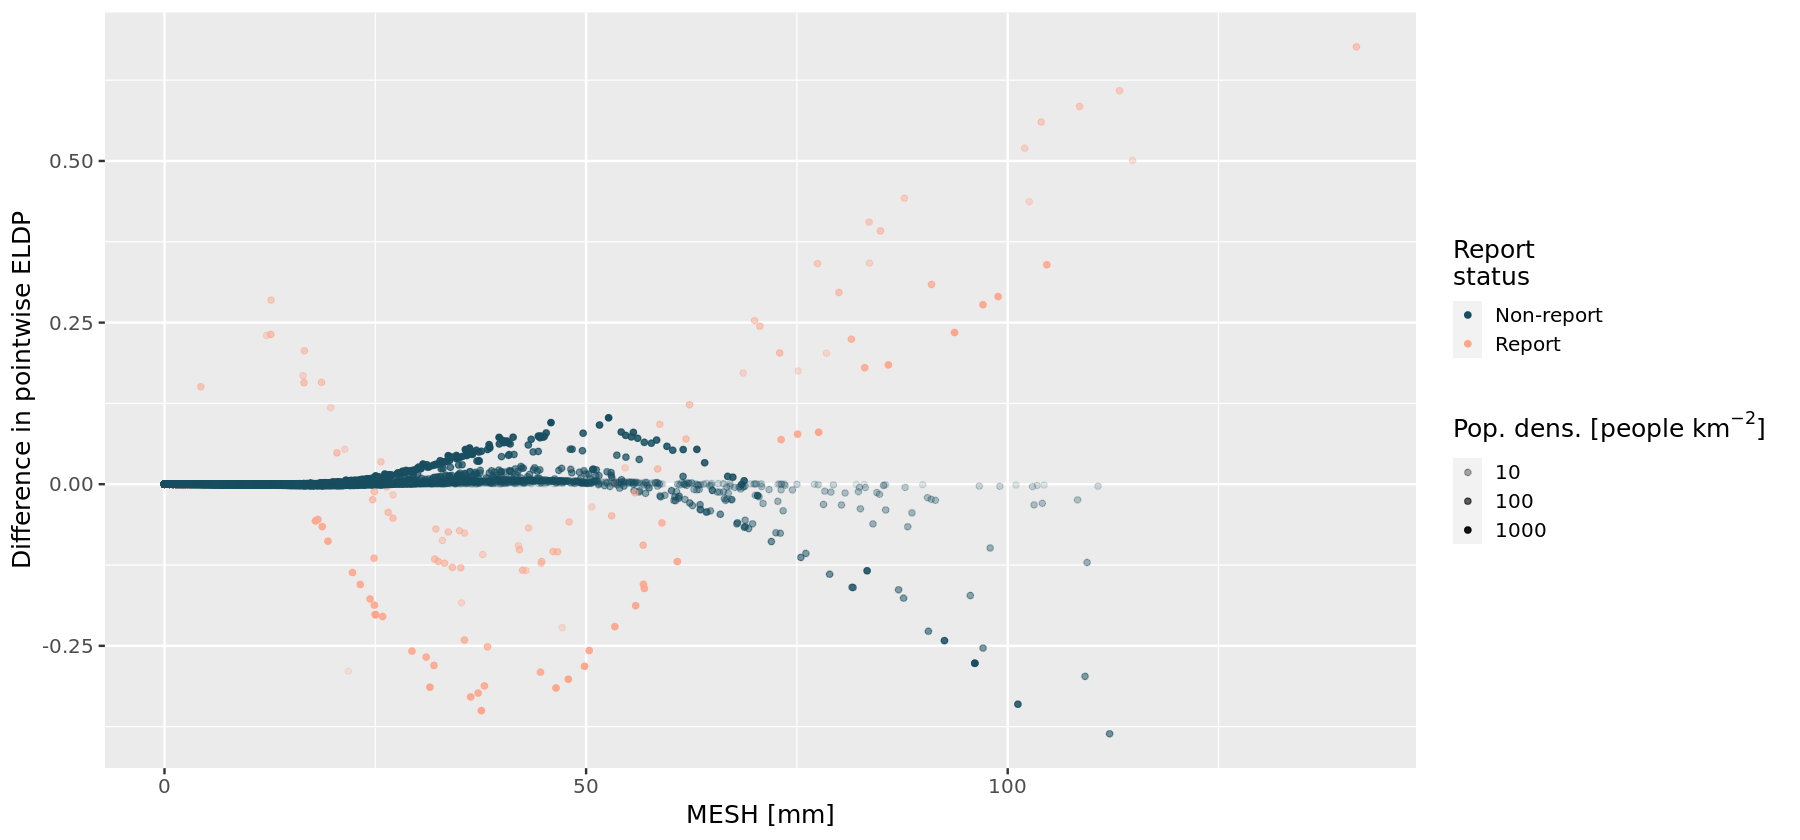

In [3]:
# plot size
options(repr.plot.width = 15, repr.plot.height = 7)

# first adding pointwise elpd estimates as columns
model_data %>%
  add_column(loo_gamma = loo_gamma$pointwise[, 1]) %>%
  add_column(loo_filter = loo_filter$pointwise[, 1]) %>%
  # calculating difference
  mutate(diff = loo_gamma - loo_filter,
         # report to named factor
         Report = as_factor(case_when(report == 0 ~ "Non-report",
                                     report == 1 ~ "Report"))) %>% 
  # plotting 
  ggplot(aes(x = mesh, y = diff, colour = Report, alpha = pop_dens)) +
  geom_point() +
  # labels
  scale_alpha_continuous(TeX("Pop. dens. [people km$^{-2}$]"), trans = "log10") +
  xlab("MESH [mm]") +
  ylab("Difference in pointwise ELDP") +
  # colour
  scale_color_manual("Report\nstatus", values = scico(2, begin = 0.2, end = 0.8, palette = "batlow")) +
  # size
  theme_gray(base_size = 15)